In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math

In [2]:
#Read the data from .csv file
#dateparse = lambda dates: pd.date(dates, '%Y-%m')

df=pd.read_excel('PMP_cleaned.xlsx',parse_dates=['Month'], index_col='Month')

In [3]:
df.head()

,Unnamed: 0,Counsellor Name,Course Type,Fees Received,Fees Total,FeesPending
Month,,,,,,
2020-11-01,0,Vineeta,PMP,6750,6750,0
2020-11-01,1,Vineeta,PMP,7500,7500,0
2020-11-01,2,Vineeta,PMP,3500,7500,4000
2020-11-01,3,Vineeta,PMP,7500,7500,0
2020-11-01,4,Tarun,PMP,7500,7500,0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Counsellor Name,Course Type,Fees Received,Fees Total,FeesPending
Month,,,,,
2020-11-01,Vineeta,PMP,6750,6750,0
2020-11-01,Vineeta,PMP,7500,7500,0
2020-11-01,Vineeta,PMP,3500,7500,4000
2020-11-01,Vineeta,PMP,7500,7500,0
2020-11-01,Tarun,PMP,7500,7500,0


In [5]:
df.tail()

,Counsellor Name,Course Type,Fees Received,Fees Total,FeesPending
Month,,,,,
2021-07-01,Vineeta,PMP,14900,14900,0
2021-07-01,Vineeta,BA With [python,13500,13500,0
2021-07-01,Vineeta,IFRS,15000,15000,0
2021-07-01,Vineeta,PMP+Agile,14900,14900,0
2021-07-01,No Counsellor,Analytics,15000,15000,0


In [6]:
df.shape

(219, 5)

In [7]:
df.head()

,Counsellor Name,Course Type,Fees Received,Fees Total,FeesPending
Month,,,,,
2020-11-01,Vineeta,PMP,6750,6750,0
2020-11-01,Vineeta,PMP,7500,7500,0
2020-11-01,Vineeta,PMP,3500,7500,4000
2020-11-01,Vineeta,PMP,7500,7500,0
2020-11-01,Tarun,PMP,7500,7500,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2020-11-01 to 2021-07-01
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Counsellor Name  219 non-null    object
 1   Course Type      219 non-null    object
 2   Fees Received    219 non-null    int64 
 3   Fees Total       219 non-null    int64 
 4   FeesPending      219 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 10.3+ KB


In [9]:
df.describe(include='all')

,Counsellor Name,Course Type,Fees Received,Fees Total,FeesPending
count,219,219,219.000000,219.000000,219.000000
unique,15,45,NaN,NaN,NaN
top,Vineeta,PMP,NaN,NaN,NaN
freq,170,129,NaN,NaN,NaN
mean,NaN,NaN,11795.716895,12135.324201,339.607306
std,NaN,NaN,7019.771757,6982.447767,1640.501115
min,NaN,NaN,2000.000000,3000.000000,0.000000
25%,NaN,NaN,8670.000000,8670.000000,0.000000
50%,NaN,NaN,11125.000000,11500.000000,0.000000
75%,NaN,NaN,13205.000000,13410.000000,0.000000


<AxesSubplot:xlabel='count', ylabel='Counsellor Name'>

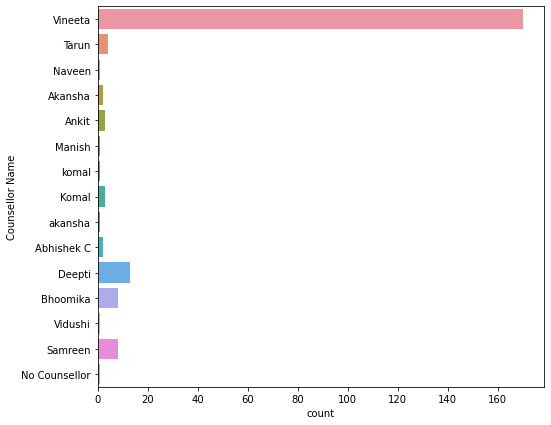

In [10]:
plt.figure(figsize=(8,7))
sns.countplot(y='Counsellor Name', data=df)

In [ ]:
df[df['Counsellor Name']=='Arya']

In [ ]:
df['Counsellor Name'].replace(to_replace=r'vipin',value='Vipin', regex=True,inplace=True)

In [ ]:
df['Counsellor Name'].replace(to_replace=779962,value='No Counsellor', regex=True,inplace=True)

In [13]:
df['Counsellor Name'].replace(to_replace=r'Abhishek C',value='Abhishek', regex=True,inplace=True)

In [11]:
df['Counsellor Name'].replace(to_replace=r'komal',value='Komal', regex=True,inplace=True)

In [12]:
df['Counsellor Name'].replace(to_replace=r'akansha',value='Akansha', regex=True,inplace=True)

In [14]:
df.describe(include='all')

,Counsellor Name,Course Type,Fees Received,Fees Total,FeesPending
count,219,219,219.000000,219.000000,219.000000
unique,13,45,NaN,NaN,NaN
top,Vineeta,PMP,NaN,NaN,NaN
freq,170,129,NaN,NaN,NaN
mean,NaN,NaN,11795.716895,12135.324201,339.607306
std,NaN,NaN,7019.771757,6982.447767,1640.501115
min,NaN,NaN,2000.000000,3000.000000,0.000000
25%,NaN,NaN,8670.000000,8670.000000,0.000000
50%,NaN,NaN,11125.000000,11500.000000,0.000000
75%,NaN,NaN,13205.000000,13410.000000,0.000000


In [15]:
totalBy=df.groupby('Counsellor Name')['Fees Total'].sum()

In [16]:
totalBy=pd.DataFrame(data=totalBy)
totalBy=totalBy.reset_index()
totalBy

,Counsellor Name,Fees Total
0,Abhishek,28310
1,Akansha,32920
2,Ankit,41605
3,Bhoomika,112800
4,Deepti,135049
5,Komal,25875
6,Manish,11920
7,Naveen,5000
8,No Counsellor,15000
9,Samreen,205000


<AxesSubplot:xlabel='count', ylabel='Counsellor Name'>

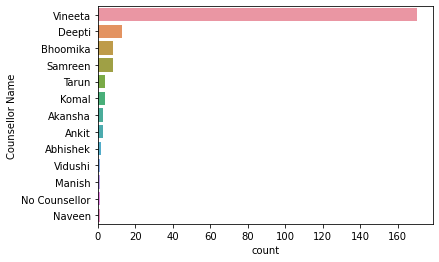

In [17]:
sns.countplot(y='Counsellor Name',order=df['Counsellor Name'].value_counts().index, data=df)

<AxesSubplot:xlabel='Fees Total', ylabel='Counsellor Name'>

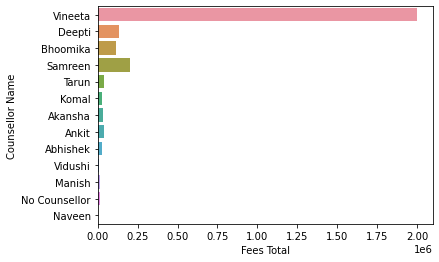

In [18]:
sns.barplot(x='Fees Total',y='Counsellor Name',order=df['Counsellor Name'].value_counts().index,data=totalBy)

In [19]:
totalByMonth=df.groupby('Month')['Fees Total'].sum()
totalByMonth=pd.DataFrame(data=totalByMonth)
totalByMonth=totalByMonth.reset_index()
totalByMonth


,Month,Fees Total
0,2020-11-01,109437
1,2020-12-01,122500
2,2021-01-01,229182
3,2021-02-01,327714
4,2021-03-01,263735
5,2021-04-01,257055
6,2021-05-01,392414
7,2021-06-01,469754
8,2021-07-01,485845


<AxesSubplot:xlabel='Fees Total', ylabel='Month'>

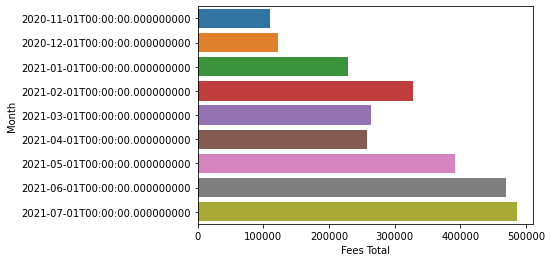

In [20]:
sns.barplot(x='Fees Total',y='Month',data=totalByMonth)

<AxesSubplot:xlabel='Month', ylabel='Fees Total'>

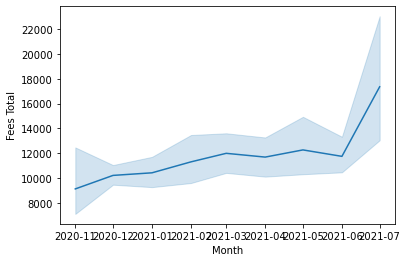

In [21]:
sns.lineplot(x='Month',y='Fees Total',data=df)

In [22]:

#totalByPending=df.groupby('Counsellor Name')['FeesPending'].sum()
#totalByPending=pd.DataFrame(data=totalByPending)
#totalByPending=totalByPending.reset_index()
#totalByPending
#totalByPending.rename({'Counsellor Name': 'CounsellorName'}, axis=1, inplace=True)
#totalByPending
#sns.barplot(x='FeesPending',y='CounsellorName',order=totalByPending.sort_values('FeesPending',ascending=False).CounsellorName,data=totalByPending)


In [23]:
corr = df.corr()
corr

,Fees Received,Fees Total,FeesPending
Fees Received,1.000000,0.972561,-0.139540
Fees Total,0.972561,1.000000,0.094661
FeesPending,-0.139540,0.094661,1.000000


In [24]:
pd.pivot_table(df,['Fees Received','Fees Total','FeesPending'], index=['Month'],aggfunc=np.sum)

,Fees Received,Fees Total,FeesPending
Month,,,
2020-11-01,105437,109437,4000
2020-12-01,113750,122500,8750
2021-01-01,229182,229182,0
2021-02-01,318814,327714,8900
2021-03-01,263735,263735,0
2021-04-01,240305,257055,16750
2021-05-01,379415,392414,12999
2021-06-01,446779,469754,22975
2021-07-01,485845,485845,0


In [25]:
Sales=pd.pivot_table(df,['Fees Total'], index=['Month'],columns=['Counsellor Name'],aggfunc=np.sum)
Sales

Fees Total                                               \
Counsellor Name   Abhishek  Akansha    Ankit Bhoomika   Deepti    Komal   
Month                                                                     
2020-11-01             NaN      NaN      NaN      NaN      NaN      NaN   
2020-12-01             NaN  10000.0      NaN      NaN      NaN      NaN   
2021-01-01             NaN      NaN  20000.0      NaN      NaN      NaN   
2021-02-01         14900.0  11000.0      NaN      NaN      NaN  19875.0   
2021-03-01             NaN      NaN      NaN      NaN      NaN   6000.0   
2021-04-01             NaN      NaN      NaN      NaN  42250.0      NaN   
2021-05-01             NaN      NaN  12665.0      NaN  69399.0      NaN   
2021-06-01         13410.0  11920.0   8940.0  26000.0  23400.0      NaN   
2021-07-01             NaN      NaN      NaN  86800.0      NaN      NaN   

                                                                            \
Counsellor Name   Manish  Naveen No Counsellor   Samreen    Tarun  Vidushi   
Month                                                                        
2020-11-01           NaN  5000.0           NaN       NaN  15000.0      NaN   
2020-12-01           NaN     NaN           NaN       NaN      NaN      NaN   
2021-01-01       11920.0     NaN           NaN       NaN      NaN      NaN   
2021-02-01           NaN     NaN           NaN       NaN  11500.0      NaN   
2021-03-01           NaN     NaN           NaN       NaN      NaN      NaN   
2021-04-01           NaN     NaN           NaN       NaN      NaN      NaN   
2021-05-01           NaN     NaN           NaN       NaN  10000.0      NaN   
2021-06-01           NaN     NaN           NaN       NaN      NaN      NaN   
2021-07-01           NaN     NaN       15000.0  205000.0      NaN  11125.0   

                           
Counsellor Name   Vineeta  
Month                      
2020-11-01        89437.0  
2020-12-01       112500.0  
2021-01-01       197262.0  
2021-02-01       270439.0  
2021-03-01       257735.0  
2021-04-01       214805.0  
2021-05-01       300350.0  
2021-06-01       386084.0  
2021-07-01       167920.0

In [26]:
Sales.loc['Total']= Sales.sum()
Sales

Fees Total                                                 \
Counsellor Name       Abhishek  Akansha    Ankit  Bhoomika    Deepti    Komal   
Month                                                                           
2020-11-01 00:00:00        NaN      NaN      NaN       NaN       NaN      NaN   
2020-12-01 00:00:00        NaN  10000.0      NaN       NaN       NaN      NaN   
2021-01-01 00:00:00        NaN      NaN  20000.0       NaN       NaN      NaN   
2021-02-01 00:00:00    14900.0  11000.0      NaN       NaN       NaN  19875.0   
2021-03-01 00:00:00        NaN      NaN      NaN       NaN       NaN   6000.0   
2021-04-01 00:00:00        NaN      NaN      NaN       NaN   42250.0      NaN   
2021-05-01 00:00:00        NaN      NaN  12665.0       NaN   69399.0      NaN   
2021-06-01 00:00:00    13410.0  11920.0   8940.0   26000.0   23400.0      NaN   
2021-07-01 00:00:00        NaN      NaN      NaN   86800.0       NaN      NaN   
Total                  28310.0  32920.0  41605.0  112800.0  135049.0  25875.0   

                                                                       \
Counsellor Name       Manish  Naveen No Counsellor   Samreen    Tarun   
Month                                                                   
2020-11-01 00:00:00      NaN  5000.0           NaN       NaN  15000.0   
2020-12-01 00:00:00      NaN     NaN           NaN       NaN      NaN   
2021-01-01 00:00:00  11920.0     NaN           NaN       NaN      NaN   
2021-02-01 00:00:00      NaN     NaN           NaN       NaN  11500.0   
2021-03-01 00:00:00      NaN     NaN           NaN       NaN      NaN   
2021-04-01 00:00:00      NaN     NaN           NaN       NaN      NaN   
2021-05-01 00:00:00      NaN     NaN           NaN       NaN  10000.0   
2021-06-01 00:00:00      NaN     NaN           NaN       NaN      NaN   
2021-07-01 00:00:00      NaN     NaN       15000.0  205000.0      NaN   
Total                11920.0  5000.0       15000.0  205000.0  36500.0   

                                         
Counsellor Name      Vidushi    Vineeta  
Month                                    
2020-11-01 00:00:00      NaN    89437.0  
2020-12-01 00:00:00      NaN   112500.0  
2021-01-01 00:00:00      NaN   197262.0  
2021-02-01 00:00:00      NaN   270439.0  
2021-03-01 00:00:00      NaN   257735.0  
2021-04-01 00:00:00      NaN   214805.0  
2021-05-01 00:00:00      NaN   300350.0  
2021-06-01 00:00:00      NaN   386084.0  
2021-07-01 00:00:00  11125.0   167920.0  
Total                11125.0  1996532.0

In [27]:
Sales = Sales.sort_values(by = 'Total', axis = 1,ascending=False)
Sales

Fees Total                                         \
Counsellor Name        Vineeta   Samreen    Deepti  Bhoomika    Ankit   
Month                                                                   
2020-11-01 00:00:00    89437.0       NaN       NaN       NaN      NaN   
2020-12-01 00:00:00   112500.0       NaN       NaN       NaN      NaN   
2021-01-01 00:00:00   197262.0       NaN       NaN       NaN  20000.0   
2021-02-01 00:00:00   270439.0       NaN       NaN       NaN      NaN   
2021-03-01 00:00:00   257735.0       NaN       NaN       NaN      NaN   
2021-04-01 00:00:00   214805.0       NaN   42250.0       NaN      NaN   
2021-05-01 00:00:00   300350.0       NaN   69399.0       NaN  12665.0   
2021-06-01 00:00:00   386084.0       NaN   23400.0   26000.0   8940.0   
2021-07-01 00:00:00   167920.0  205000.0       NaN   86800.0      NaN   
Total                1996532.0  205000.0  135049.0  112800.0  41605.0   

                                                                       \
Counsellor Name        Tarun  Akansha Abhishek    Komal No Counsellor   
Month                                                                   
2020-11-01 00:00:00  15000.0      NaN      NaN      NaN           NaN   
2020-12-01 00:00:00      NaN  10000.0      NaN      NaN           NaN   
2021-01-01 00:00:00      NaN      NaN      NaN      NaN           NaN   
2021-02-01 00:00:00  11500.0  11000.0  14900.0  19875.0           NaN   
2021-03-01 00:00:00      NaN      NaN      NaN   6000.0           NaN   
2021-04-01 00:00:00      NaN      NaN      NaN      NaN           NaN   
2021-05-01 00:00:00  10000.0      NaN      NaN      NaN           NaN   
2021-06-01 00:00:00      NaN  11920.0  13410.0      NaN           NaN   
2021-07-01 00:00:00      NaN      NaN      NaN      NaN       15000.0   
Total                36500.0  32920.0  28310.0  25875.0       15000.0   

                                               
Counsellor Name       Manish  Vidushi  Naveen  
Month                                          
2020-11-01 00:00:00      NaN      NaN  5000.0  
2020-12-01 00:00:00      NaN      NaN     NaN  
2021-01-01 00:00:00  11920.0      NaN     NaN  
2021-02-01 00:00:00      NaN      NaN     NaN  
2021-03-01 00:00:00      NaN      NaN     NaN  
2021-04-01 00:00:00      NaN      NaN     NaN  
2021-05-01 00:00:00      NaN      NaN     NaN  
2021-06-01 00:00:00      NaN      NaN     NaN  
2021-07-01 00:00:00      NaN  11125.0     NaN  
Total                11920.0  11125.0  5000.0

In [28]:
Sales["Total Sales"] = Sales.sum(axis=1)
Sales

Fees Total                                         \
Counsellor Name        Vineeta   Samreen    Deepti  Bhoomika    Ankit   
Month                                                                   
2020-11-01 00:00:00    89437.0       NaN       NaN       NaN      NaN   
2020-12-01 00:00:00   112500.0       NaN       NaN       NaN      NaN   
2021-01-01 00:00:00   197262.0       NaN       NaN       NaN  20000.0   
2021-02-01 00:00:00   270439.0       NaN       NaN       NaN      NaN   
2021-03-01 00:00:00   257735.0       NaN       NaN       NaN      NaN   
2021-04-01 00:00:00   214805.0       NaN   42250.0       NaN      NaN   
2021-05-01 00:00:00   300350.0       NaN   69399.0       NaN  12665.0   
2021-06-01 00:00:00   386084.0       NaN   23400.0   26000.0   8940.0   
2021-07-01 00:00:00   167920.0  205000.0       NaN   86800.0      NaN   
Total                1996532.0  205000.0  135049.0  112800.0  41605.0   

                                                                       \
Counsellor Name        Tarun  Akansha Abhishek    Komal No Counsellor   
Month                                                                   
2020-11-01 00:00:00  15000.0      NaN      NaN      NaN           NaN   
2020-12-01 00:00:00      NaN  10000.0      NaN      NaN           NaN   
2021-01-01 00:00:00      NaN      NaN      NaN      NaN           NaN   
2021-02-01 00:00:00  11500.0  11000.0  14900.0  19875.0           NaN   
2021-03-01 00:00:00      NaN      NaN      NaN   6000.0           NaN   
2021-04-01 00:00:00      NaN      NaN      NaN      NaN           NaN   
2021-05-01 00:00:00  10000.0      NaN      NaN      NaN           NaN   
2021-06-01 00:00:00      NaN  11920.0  13410.0      NaN           NaN   
2021-07-01 00:00:00      NaN      NaN      NaN      NaN       15000.0   
Total                36500.0  32920.0  28310.0  25875.0       15000.0   

                                              Total Sales  
Counsellor Name       Manish  Vidushi  Naveen              
Month                                                      
2020-11-01 00:00:00      NaN      NaN  5000.0    109437.0  
2020-12-01 00:00:00      NaN      NaN     NaN    122500.0  
2021-01-01 00:00:00  11920.0      NaN     NaN    229182.0  
2021-02-01 00:00:00      NaN      NaN     NaN    327714.0  
2021-03-01 00:00:00      NaN      NaN     NaN    263735.0  
2021-04-01 00:00:00      NaN      NaN     NaN    257055.0  
2021-05-01 00:00:00      NaN      NaN     NaN    392414.0  
2021-06-01 00:00:00      NaN      NaN     NaN    469754.0  
2021-07-01 00:00:00      NaN  11125.0     NaN    485845.0  
Total                11920.0  11125.0  5000.0   2657636.0

In [29]:
Sales = Sales.sort_values(by = 'Total', axis = 1,ascending=False)
Sales

Total Sales Fees Total                                \
Counsellor Name                    Vineeta   Samreen    Deepti  Bhoomika   
Month                                                                      
2020-11-01 00:00:00    109437.0    89437.0       NaN       NaN       NaN   
2020-12-01 00:00:00    122500.0   112500.0       NaN       NaN       NaN   
2021-01-01 00:00:00    229182.0   197262.0       NaN       NaN       NaN   
2021-02-01 00:00:00    327714.0   270439.0       NaN       NaN       NaN   
2021-03-01 00:00:00    263735.0   257735.0       NaN       NaN       NaN   
2021-04-01 00:00:00    257055.0   214805.0       NaN   42250.0       NaN   
2021-05-01 00:00:00    392414.0   300350.0       NaN   69399.0       NaN   
2021-06-01 00:00:00    469754.0   386084.0       NaN   23400.0   26000.0   
2021-07-01 00:00:00    485845.0   167920.0  205000.0       NaN   86800.0   
Total                 2657636.0  1996532.0  205000.0  135049.0  112800.0   

                                                                  \
Counsellor Name        Ankit    Tarun  Akansha Abhishek    Komal   
Month                                                              
2020-11-01 00:00:00      NaN  15000.0      NaN      NaN      NaN   
2020-12-01 00:00:00      NaN      NaN  10000.0      NaN      NaN   
2021-01-01 00:00:00  20000.0      NaN      NaN      NaN      NaN   
2021-02-01 00:00:00      NaN  11500.0  11000.0  14900.0  19875.0   
2021-03-01 00:00:00      NaN      NaN      NaN      NaN   6000.0   
2021-04-01 00:00:00      NaN      NaN      NaN      NaN      NaN   
2021-05-01 00:00:00  12665.0  10000.0      NaN      NaN      NaN   
2021-06-01 00:00:00   8940.0      NaN  11920.0  13410.0      NaN   
2021-07-01 00:00:00      NaN      NaN      NaN      NaN      NaN   
Total                41605.0  36500.0  32920.0  28310.0  25875.0   

                                                             
Counsellor Name     No Counsellor   Manish  Vidushi  Naveen  
Month                                                        
2020-11-01 00:00:00           NaN      NaN      NaN  5000.0  
2020-12-01 00:00:00           NaN      NaN      NaN     NaN  
2021-01-01 00:00:00           NaN  11920.0      NaN     NaN  
2021-02-01 00:00:00           NaN      NaN      NaN     NaN  
2021-03-01 00:00:00           NaN      NaN      NaN     NaN  
2021-04-01 00:00:00           NaN      NaN      NaN     NaN  
2021-05-01 00:00:00           NaN      NaN      NaN     NaN  
2021-06-01 00:00:00           NaN      NaN      NaN     NaN  
2021-07-01 00:00:00       15000.0      NaN  11125.0     NaN  
Total                     15000.0  11920.0  11125.0  5000.0

In [30]:
Sales.to_excel("PMP_Sales.xlsx")

# Forecasting

In [ ]:
totalByMonth=df.groupby('Month')['Fees Total'].sum()
totalByMonth=pd.DataFrame(data=totalByMonth)
#totalByMonth=totalByMonth.reset_index()
df=totalByMonth
df

In [ ]:
df.plot()

## Testing For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Fees Total'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Fees Total'])

### Differencing

In [ ]:
df['Fees Total Difference'] = df['Fees Total'] - df['Fees Total'].shift(1)

In [ ]:
df.head()

In [ ]:
## Again test dickey fuller test
adfuller_test(df['Fees Total Difference'].dropna())

In [ ]:
df['Fees Total Difference'].plot()

In [ ]:
df['Fees Total Difference2'] = df['Fees Total Difference'] - df['Fees Total Difference'].shift(1)

In [ ]:
## Again test dickey fuller test
adfuller_test(df['Fees Total Difference2'].dropna())

In [ ]:
df.head()

In [ ]:
df['Fees Total Difference2'].plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Fees Total Difference2'].dropna(),lags=13,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Fees Total Difference2'].dropna(),lags=6,ax=ax2)

In [ ]:
# For non-seasonal data
#p=0, d=2, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['Fees Total'],order=(0,2,1))
model_fit=model.fit()

In [ ]:
model_fit.summary()

In [ ]:
df['forecast']=model_fit.predict(start=12,end=16,dynamic=True)
df[['Fees Total','forecast']].plot(figsize=(12,8))

In [ ]:

model=sm.tsa.statespace.SARIMAX(df['Fees Total'],order=(0, 2, 1),seasonal_order=(0,2,1,5))
results=model.fit()

In [ ]:

df['forecast']=results.predict(start=12,end=16,dynamic=True)
df[['Fees Total','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,4)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

In [ ]:
future_df=pd.concat([df,future_datest_df])

In [ ]:
future_df['forecast'] = results.predict(start = 15, end = 20, dynamic= True)  
future_df[['Fees Total', 'forecast']].plot(figsize=(12, 8))